In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
data = pd.merge(ride_data, city_data, how="left", on="city")

# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


# Bubble Plot of Ride Sharing Data

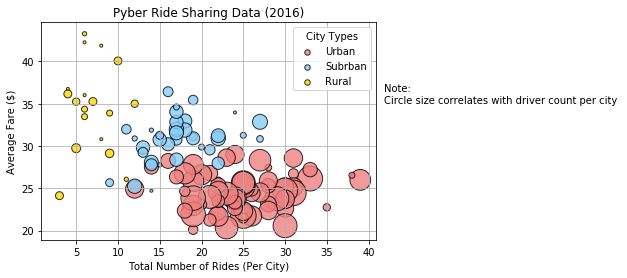

In [2]:
# Remove columns from master data set that are not necessary
bubble_data = data[["city", "fare", "type", "driver_count"]]

# Pull data for each city type
urban = bubble_data.loc[bubble_data['type'] == 'Urban']
suburban = bubble_data.loc[bubble_data['type'] == 'Suburban']
rural = bubble_data.loc[bubble_data['type'] == 'Rural']

#Calculate total rides per city for each city type
urban_total_rides = urban.city.value_counts()
suburban_total_rides = suburban.city.value_counts()
rural_total_rides = rural.city.value_counts()

#Convert total rides series to dataframes
urban_total_rides_df = pd.DataFrame({'total_rides':urban_total_rides})
suburban_total_rides_df = pd.DataFrame({'total_rides':suburban_total_rides})
rural_total_rides_df = pd.DataFrame({'total_rides':rural_total_rides})

#Rename index title of each dataframe
urban_total_rides_df.index.name = 'city'
suburban_total_rides_df.index.name = 'city'
rural_total_rides_df.index.name = 'city'

#Calculate average fare per city for each city type
urban_averages = urban.groupby('city').mean()
suburban_averages = suburban.groupby('city').mean()
rural_averages = rural.groupby('city').mean()

#Merge total rides and average fare dataframes for each city type
urban_merged = pd.merge(urban_total_rides_df, urban_averages, how="left", on="city")
suburban_merged = pd.merge(suburban_total_rides_df, suburban_averages, how="left", on="city")
rural_merged = pd.merge(rural_total_rides_df, rural_averages, how="left", on="city")

# Obtain the x, y, and s coordinates for each of the three city types
urban_x = urban_merged['total_rides']
urban_y = urban_merged['fare']
urban_s = urban_merged['driver_count']
suburban_x = suburban_merged['total_rides']
suburban_y = suburban_merged['fare']
suburban_s = suburban_merged['driver_count']
rural_x = rural_merged['total_rides']
rural_y = rural_merged['fare']
rural_s = rural_merged['driver_count']

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, s=urban_s*9, color = '#f08080', alpha=0.8, edgecolor='black', linewidth=1.0)
plt.scatter(suburban_x, suburban_y, s=suburban_s*9, color = '#87cefa', alpha=0.8, edgecolor='black', linewidth=1.0)
plt.scatter(rural_x, rural_y, s=rural_s*9, color = '#FFD700', alpha=0.8, edgecolor='black', linewidth=1.0)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

# Create a legend
l = plt.legend(title="City Types")
l.get_texts()[0].set_text('Urban')
l.get_texts()[1].set_text('Subrban')
l.get_texts()[2].set_text('Rural')
l.legendHandles[0]._sizes = [30]
l.legendHandles[1]._sizes = [30]
l.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(0.92, 0.6,"Note: \n Circle size correlates with driver count per city", wrap=True,
            horizontalalignment='left', fontsize=10)

# Save Figure
plt.savefig("PyberRideSharingData.png")

# Show plot
plt.show()

# Total Fares by City Type

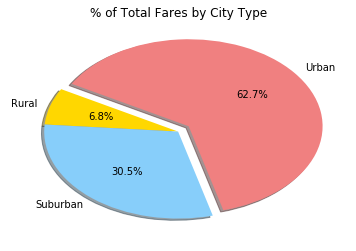

In [3]:
# Calculate totals for pie chart
urban_grand_total_fares = urban['fare'].sum()
suburban_grand_total_fares = suburban['fare'].sum()
rural_grand_total_fares = rural['fare'].sum()

# Build Pie Chart
fare_labels = ["Urban", "Rural", "Suburban"]
fare_percentages = [urban_grand_total_fares, rural_grand_total_fares, suburban_grand_total_fares]
colors = ['#f08080', '#FFD700', '#87cefa']
explode = (0.1, 0, 0)
plt.pie(fare_percentages, colors=colors, labels=fare_labels, explode=explode, startangle=285, shadow=True, autopct="%1.1f%%")
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("farespie.png")

# Show Figure
plt.show()

# Total Rides by City Type

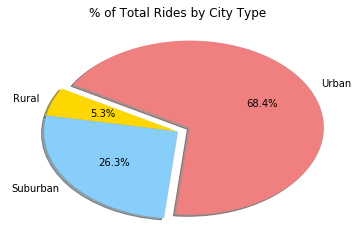

In [4]:
# Calculate totals for pie chart
urban_grand_total_rides = urban_total_rides.sum()
suburban_grand_total_rides = suburban_total_rides.sum()
rural_grand_total_rides = rural_total_rides.sum()

# Build Pie Chart
ride_labels = ["Urban", "Rural", "Suburban"]
ride_percentages = [urban_grand_total_rides, rural_grand_total_rides, suburban_grand_total_rides]
colors = ['#f08080', '#FFD700', '#87cefa']
explode = (0.1, 0, 0)
plt.pie(ride_percentages, colors=colors, labels=ride_labels, explode=explode, startangle=264, shadow=True, autopct="%1.1f%%")
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("ridespie.png")

# Show Figure
plt.show()

# Total Drivers by City Type

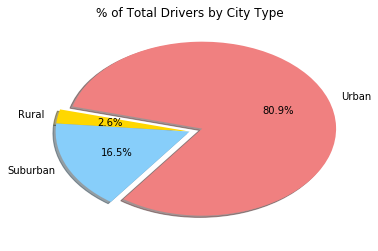

In [5]:
# Remove columns from master data set that are not necessary
driver_data = city_data[["type", "driver_count"]]

# Separate city data by type
urban_city_data = driver_data.loc[driver_data['type'] == 'Urban']
suburban_city_data = driver_data.loc[driver_data['type'] == 'Suburban']
rural_city_data = driver_data.loc[driver_data['type'] == 'Rural']

# Calculate totals for pie chart
urban_grand_total_drivers = urban_city_data.driver_count.sum()
suburban_grand_total_drivers = suburban_city_data.driver_count.sum()
rural_grand_total_drivers = rural_city_data.driver_count.sum()

# Build Pie Chart
driver_labels = ["Urban", "Rural", "Suburban"]
driver_percentages = [urban_grand_total_drivers, rural_grand_total_drivers, suburban_grand_total_drivers]
colors = ['#f08080', '#FFD700', '#87cefa']
explode = (0.1, 0, 0)
plt.pie(driver_percentages, colors=colors, labels=driver_labels, explode=explode, startangle=234, shadow=True, autopct="%1.1f%%")
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("driversspie.png")

# Show Figure
plt.show()

# Observable Trends

Taking a look at the data, there are certain conclusions that appear that make logical sense. When comparing the three city types, we see that there are generally more rides and more drivers in urban areas. This makes sense given that there are higher populations in urban areas, allowing for more drivers and requiring more rides. We also see that fares are generally lowest in urban areas and highest in rural areas. This also makes sense, given that there are probably higher distances between landmarks/destinations, thus requiring higher fares.